In [1]:
import pandas as pd

In [2]:
yearly= pd.read_csv('E:/Datasets/Project DataSet/Handwashing/yearly_deaths_by_clinic.csv')

In [3]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [14]:
yearly['proportion_deaths'] = yearly["deaths"]/yearly["births"]

In [15]:
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [16]:
clinic_1 = yearly[yearly["clinic"] == "clinic 1"]

In [17]:
clinic_1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [18]:
clinic_2 = yearly[yearly["clinic"] == "clinic 2"]

In [19]:
clinic_2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Proportion Deaths')

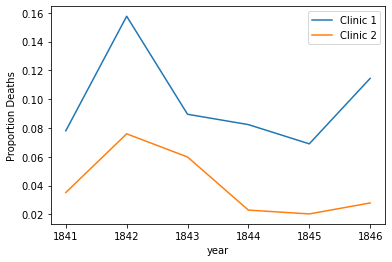

In [32]:
ax= clinic_1.plot(x='year',y='proportion_deaths',label="Clinic 1") 
clinic_2.plot (x='year',y='proportion_deaths',label="Clinic 2",ax=ax)
ax.set_ylabel("Proportion Deaths")

In [38]:
# Load Monthly Data

monthly = pd.read_csv('E:/Datasets/Project DataSet/Handwashing/monthly_deaths.csv',parse_dates=['date'])

In [39]:
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [40]:
monthly["proportion_deaths"]= monthly['deaths']/monthly['births']

In [41]:
monthly

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [43]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


Text(0, 0.5, 'Proportion Deaths')

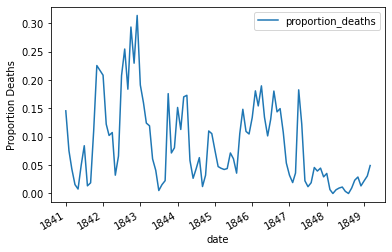

In [45]:
ax = monthly.plot(x='date',y='proportion_deaths')
ax.set_ylabel('Proportion Deaths')

In [46]:
handwashing_start = pd.to_datetime('1847-07-01')

In [47]:
before_washing= monthly[monthly['date']<handwashing_start]
after_washing= monthly[monthly['date']>=handwashing_start]

Text(0, 0.5, 'proportion deaths')

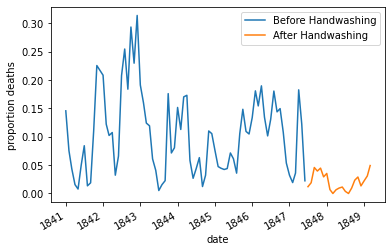

In [51]:
ax = before_washing.plot(x='date', y='proportion_deaths',label='Before Handwashing')
after_washing.plot(x='date',y='proportion_deaths',ax=ax,label='After Handwashing')
ax.set_ylabel('proportion deaths')

In [52]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

mean_diff = after_proportion.mean()-before_proportion.mean()
mean_diff

-0.08294472769332184

In [53]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1,replace=True)
    boot_after = after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())

In [54]:
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.100130
0.975   -0.065232
dtype: float64